<span style="font-family:Avenir;">
<font color="yellow"> <h1> Example </font> Title </h1> 
</span>

<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Stating Questions </h2> </font>
</span>



<span style="font-family:Avenir; font-size:1.4em;">
✦ <font color="Cyan"> What is the expected number of pull requests over all Python
repositories that were made in 2023?
 </font>


</span>



<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The question is interesting and answerable from the data.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The question is interesting because software companies need to predict python contributions for 2023, and it it is answerable because we have data on repositories languages, creation dates, and pull requests.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Expectations and data match.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Exploratory Data Analytics</h2> </font>
</span>

### Imports

In [1]:
import sys
sys.path.append('../../')
from DataPreparation.Preprocess import read_data 
from DataPreparation.Visualize import convey_insights
sys.path.pop()
from Logic import *

### Reading Data

In [2]:
### EDA code goes here
data , _ = read_data(kind='all' , fix = False)

### Data Preprocessing

In [3]:
data = preprocess_data(data)

In [4]:
data.head()

,primaryLanguage,pullRequests,year,month
4,Python,2,2018,12
9,Python,1,2019,1
21,Python,0,2017,9
39,Python,5,2020,10
47,Python,1,2019,1


### Exploring python repositories and their pull requests

Number of repos with python as primary language:  15634
Available years from 2009 to 2020
Number of pull requests over all python repos from 2009 to 2022:  51494
Number of pull requests in 2009: 2
Number of pull requests in 2010: 10
Number of pull requests in 2011: 93
Number of pull requests in 2012: 348
Number of pull requests in 2013: 620
Number of pull requests in 2014: 1001
Number of pull requests in 2015: 4293
Number of pull requests in 2016: 4223
Number of pull requests in 2017: 6866
Number of pull requests in 2018: 7673
Number of pull requests in 2019: 11380
Number of pull requests in 2020: 14985


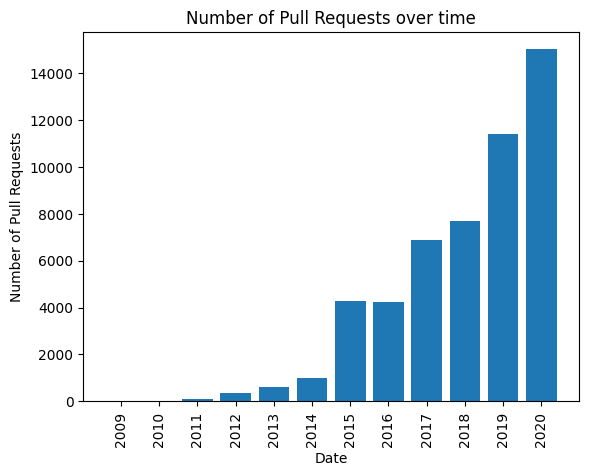

Number of pull requests in 2020-12: 1468
Number of pull requests in 2020-11: 1505
Number of pull requests in 2020-10: 2469
Number of pull requests in 2020-9: 850
Number of pull requests in 2020-8: 876
Number of pull requests in 2020-7: 1198
Number of pull requests in 2020-6: 1127
Number of pull requests in 2020-5: 1263
Number of pull requests in 2020-4: 632
Number of pull requests in 2020-3: 1768
Number of pull requests in 2020-2: 1126
Number of pull requests in 2020-1: 703
Number of pull requests in 2019-12: 705
Number of pull requests in 2019-11: 747
Number of pull requests in 2019-10: 2431
Number of pull requests in 2019-9: 322
Number of pull requests in 2019-8: 306
Number of pull requests in 2019-7: 835
Number of pull requests in 2019-6: 1040


In [5]:
data_df = explore_data(data)

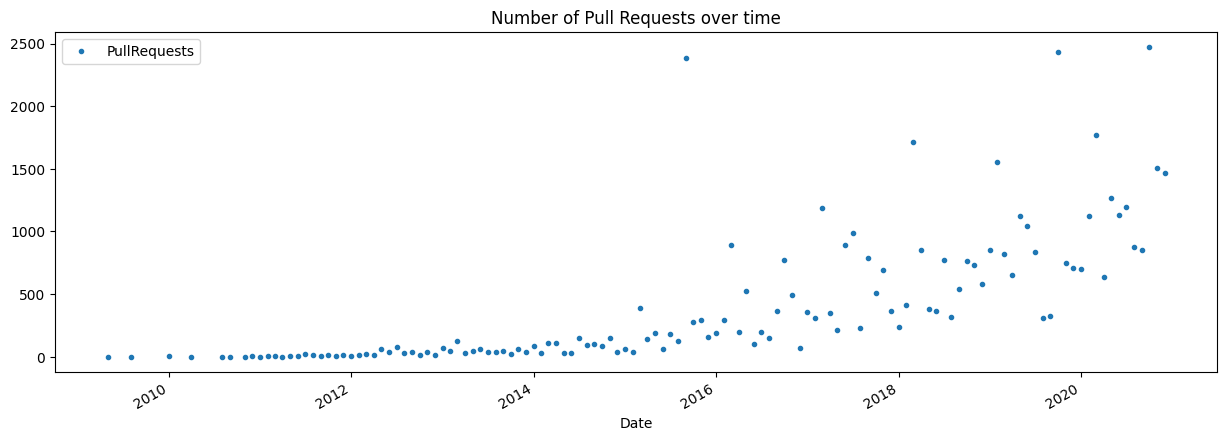

In [6]:
plot_data(data_df)

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      There is more than 25000 python repositories on the data and theses repositories have over 100000 pull requests.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Already we have 29693 python repositories and 214164 pull requests.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Expectations and data match.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Model Building</h2> </font>
</span>

### Splitting Data

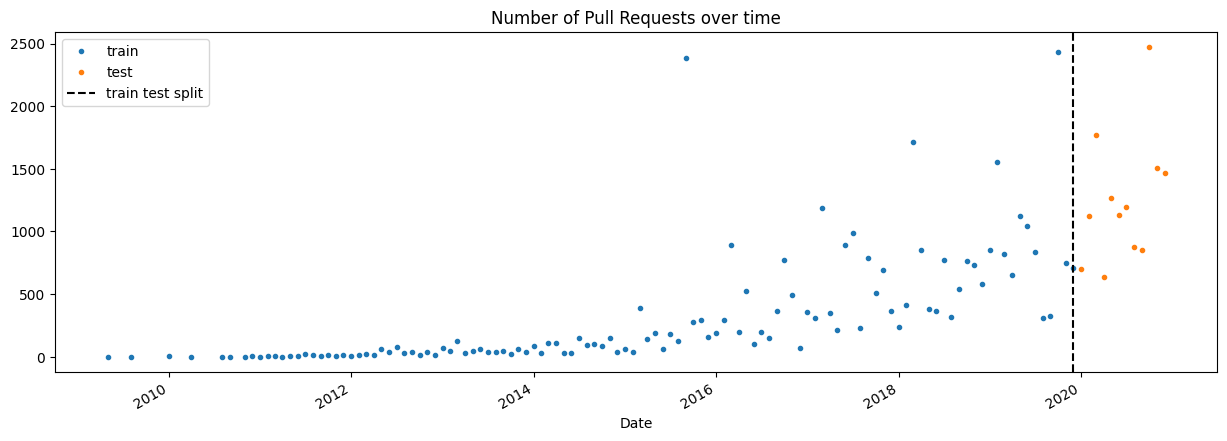

In [7]:
train_data , test_data = split_data(data_df)
plot_train_test(train_data , test_data)

### Features Extraction

In [8]:
train_data = create_features(train_data)
test_data = create_features(test_data)

In [9]:
train_data.columns

Index(['PullRequests', 'year', 'month'], dtype='object')

In [10]:
FEATURES = ['year' ,  'month']
TARGET = 'PullRequests'

In [11]:
X_train = train_data[FEATURES]
y_train = train_data[TARGET]

X_test = test_data[FEATURES]
y_test = test_data[TARGET]

### Creating XGBoost Model

In [12]:
model = train_model(X_train , y_train , X_test , y_test)    

[0]	validation_0-rmse:546.38726	validation_1-rmse:1340.16595
[100]	validation_0-rmse:511.34956	validation_1-rmse:1262.78390
[200]	validation_0-rmse:479.67244	validation_1-rmse:1192.95172
[300]	validation_0-rmse:451.05847	validation_1-rmse:1129.99322
[400]	validation_0-rmse:425.41720	validation_1-rmse:1075.47640
[500]	validation_0-rmse:402.24809	validation_1-rmse:1026.23552
[600]	validation_0-rmse:381.08934	validation_1-rmse:981.92571
[700]	validation_0-rmse:360.31840	validation_1-rmse:941.14910
[800]	validation_0-rmse:341.08880	validation_1-rmse:902.77234
[900]	validation_0-rmse:323.61984	validation_1-rmse:867.51004
[1000]	validation_0-rmse:307.69378	validation_1-rmse:835.06394
[1100]	validation_0-rmse:292.93194	validation_1-rmse:805.03185
[1200]	validation_0-rmse:279.29558	validation_1-rmse:777.33441
[1300]	validation_0-rmse:266.76034	validation_1-rmse:751.77945
[1400]	validation_0-rmse:255.32839	validation_1-rmse:728.81175
[1500]	validation_0-rmse:245.12490	validation_1-rmse:709.5749

### Feature Importance

<AxesSubplot:title={'center':'Feature Importance'}>

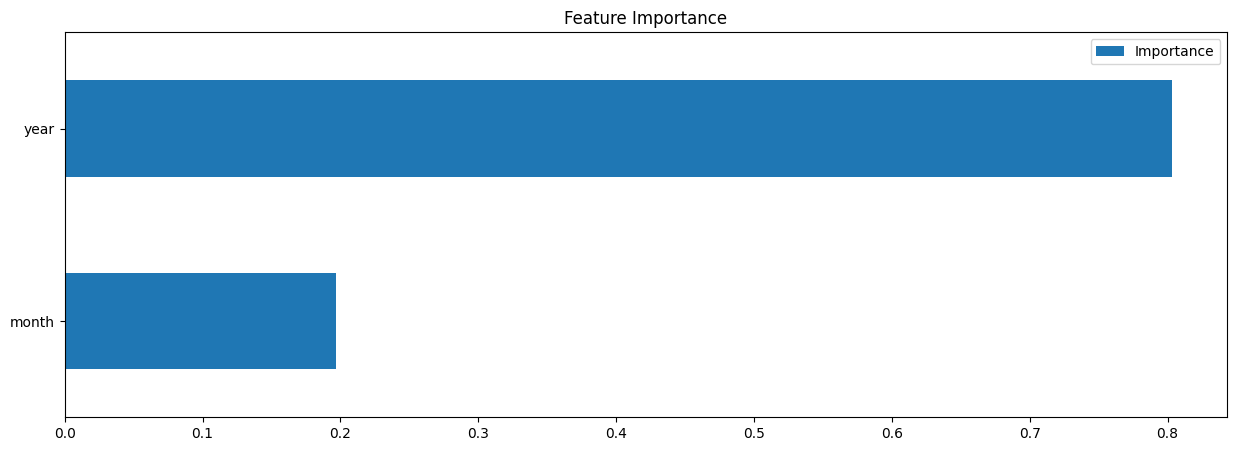

In [13]:
fi = pd.DataFrame(model.feature_importances_ , FEATURES , columns=['Importance']).sort_values(by='Importance' , ascending=False)
fi.sort_values(by='Importance' , ascending=True).plot(kind='barh' , figsize=(15,5) , title='Feature Importance')

### Forcast on Test Data

In [14]:
test_data['Predictions'] = model.predict(X_test)


In [15]:
data_df = data_df.merge(test_data[['Predictions']] , left_index=True , right_index=True , how='left')

In [16]:
data_df.head()

,PullRequests,Predictions
Date,,
2009-05-01,1,NaN
2009-08-01,1,NaN
2010-01-01,4,NaN
2010-04-01,1,NaN
2010-08-01,1,NaN


In [17]:
train_data['Train_Predictions'] = model.predict(X_train)

data_df = data_df.merge(train_data[['Train_Predictions']] , left_index=True , right_index=True , how='left')

Text(0.5, 1.0, 'Number of Pull Requests over time - Actual vs Predicted')

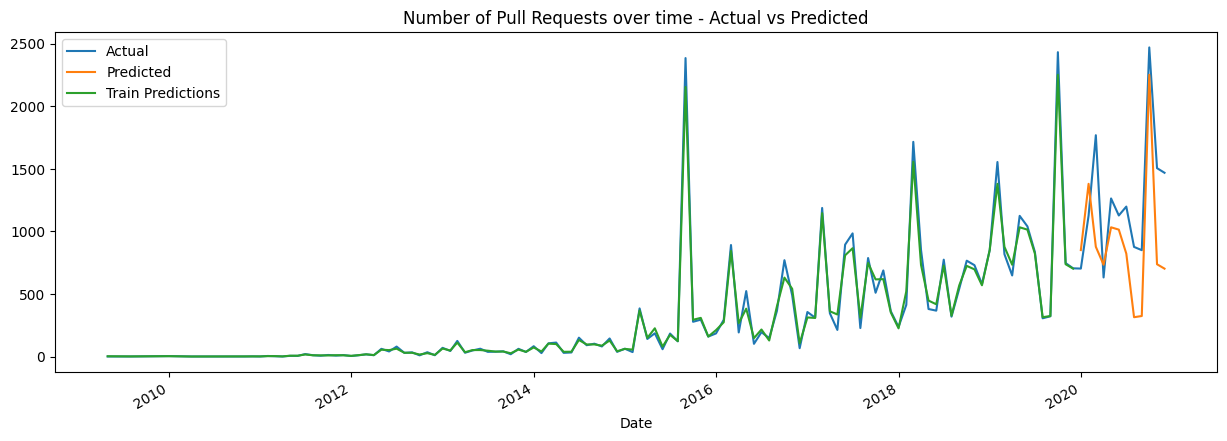

In [18]:
ax = data_df['PullRequests'].plot(figsize=(15,5) , color=color_pal[0] , title='Number of Pull Requests over time')
data_df['Predictions'].plot(ax=ax , color=color_pal[1] , title='Number of Pull Requests over time')
data_df['Train_Predictions'].plot(ax=ax , color=color_pal[2] , title='Number of Pull Requests over time')
ax.legend(['Actual' , 'Predicted' , 'Train Predictions'])
ax.set_title('Number of Pull Requests over time - Actual vs Predicted')

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Results & Interpretation</h2> </font>
</span>

In [19]:
### Probably code that will generate markdown

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Communicating Results</h2> </font>
</span>

In [20]:
### Probably code that will generate markdown

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>

